In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split


In [2]:
data= pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data['median_house_value'].mean()

206864.41315519012

In [8]:
def affordable(x):
    if x>206864:
        return 1
    else:
        return 0
data['median_house_value_Binary']=data['median_house_value'].map(affordable) # Develop a it to a label column.


In 'median_house_value_Binary' column, if it is 1 then it is unaffordable or else affordable

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_Binary
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0


In [10]:
le = LabelEncoder()
uniq_labels_ocean_proximity = data.ocean_proximity.unique()
uniq_labels_ocean_proximity


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
le.fit(uniq_labels_ocean_proximity)

LabelEncoder()

In [12]:
data['ocean_proximity'] = le.transform(data['ocean_proximity'])

In [13]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_Binary
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0


In [14]:
x = data.drop(['median_house_value','median_house_value_Binary'], axis=1) #all columns except median_house_value will be features
y = data['median_house_value_Binary'] #label

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 1.5 MB


In [16]:
y.info()

<class 'pandas.core.series.Series'>
Index: 20433 entries, 0 to 20639
Series name: median_house_value_Binary
Non-Null Count  Dtype
--------------  -----
20433 non-null  int64
dtypes: int64(1)
memory usage: 319.3 KB


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

### K=17 and threshold= 0.5

In [18]:
# Set the number of neighbors for KNN
K = 17
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)  # Fit the model

# Set initial threshold
threshold = 0.5

# Predict probabilities for the training set
train_proba = model.predict_proba(x_train)[:, 1]

# Predict classes based on the threshold for the training set
y_train_pred = (train_proba >= threshold).astype(int)

# Similarly, predict probabilities for the test set
test_proba = model.predict_proba(x_test)[:, 1]

# Predict classes based on the threshold for the test set
y_test_pred = (test_proba >= threshold).astype(int)


In [19]:
# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1925  500]
 [ 722  940]]


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

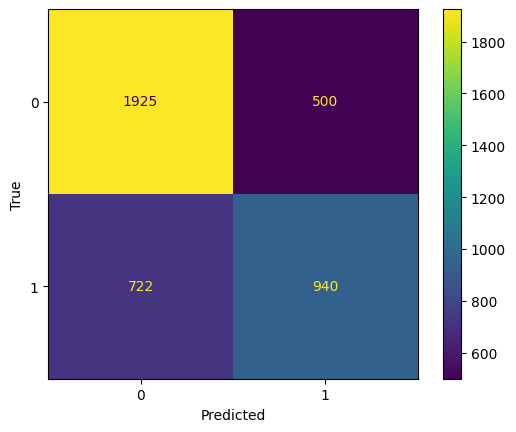

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
m = confusion_matrix(y_test, y_test_pred, normalize='all')
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

## Now let's put the above code into a function and see confusion matrix for various thresholds 

In [22]:
Rec_lst=[]
Prec_lst=[]
F1_lst=[]
Acc_lst=[]
Thres_lst=[]

def train_test(x):
    threshold = x
    
    # Predict probabilities for the training set
    train_proba = model.predict_proba(x_train)[:, 1]
    
    # Predict classes based on the threshold for the training set
    y_train_pred = (train_proba >= threshold).astype(int)
    
    # Similarly, predict probabilities for the test set
    test_proba = model.predict_proba(x_test)[:, 1]
    
    # Predict classes based on the threshold for the test set
    y_test_pred = (test_proba >= threshold).astype(int)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:\n", conf_matrix)
    m = confusion_matrix(y_test, y_test_pred, normalize='all')
    cmd = ConfusionMatrixDisplay(conf_matrix)
    cmd.plot()
    cmd.ax_.set(xlabel='Predicted', ylabel='True')
  
    TP=conf_matrix[1,1]
    FP=conf_matrix[0,1]
    TN=conf_matrix[0,0]
    FN=conf_matrix[1,0]

    Recall = TP/(TP+FN)
    Precision= TP/(TP+FP)
    F1=2*(Recall*Precision)/(Recall+Precision)
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    print(" Recall:",Recall,"\n Precision:",Precision,"\n F1 Score:",F1,"\n Accuracy:",Accuracy)
    Rec_lst.append(Recall)
    Prec_lst.append(Precision)
    F1_lst.append(F1)
    Acc_lst.append(Accuracy)
    Thres_lst.append(x)

Confusion Matrix:
 [[2295  130]
 [1154  508]]
 Recall: 0.3056558363417569 
 Precision: 0.7962382445141066 
 F1 Score: 0.44173913043478263 
 Accuracy: 0.6858331294347932


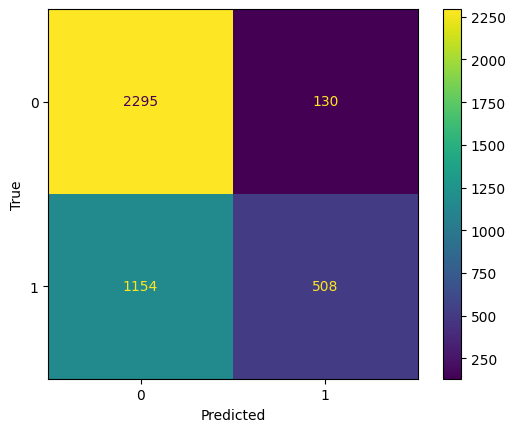

In [23]:
train_test(0.7)

Confusion Matrix:
 [[1336 1089]
 [ 334 1328]]
 Recall: 0.7990373044524669 
 Precision: 0.5494414563508482 
 F1 Score: 0.6511399852905124 
 Accuracy: 0.6518228529483729


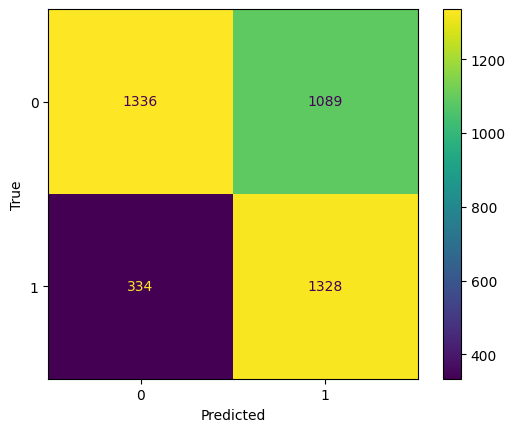

In [24]:
train_test(0.3)

Confusion Matrix:
 [[2414   11]
 [1549  113]]
 Recall: 0.06799037304452467 
 Precision: 0.9112903225806451 
 F1 Score: 0.1265397536394177 
 Accuracy: 0.61830193295816


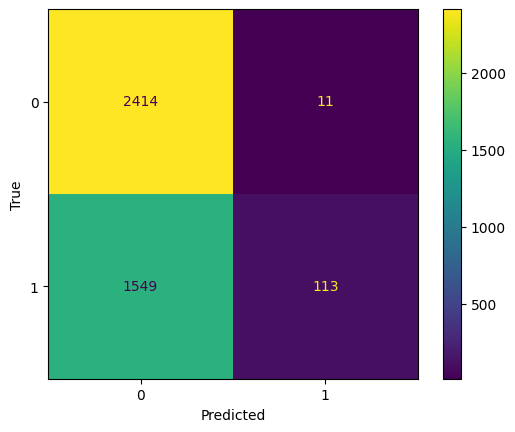

In [25]:
train_test(0.9)

Confusion Matrix:
 [[ 417 2008]
 [  43 1619]]
 Recall: 0.9741275571600482 
 Precision: 0.4463744141163496 
 F1 Score: 0.6122140291170354 
 Accuracy: 0.4981649131392219


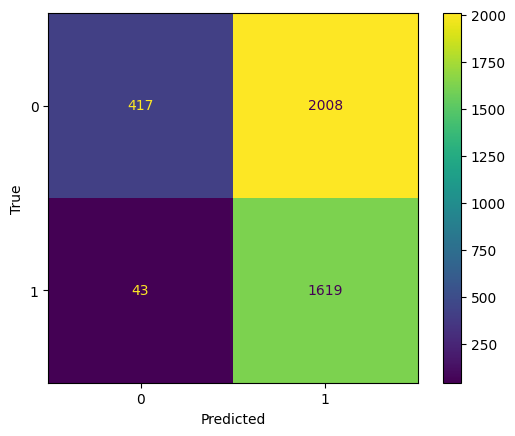

In [26]:
train_test(0.1)

Confusion Matrix:
 [[1925  500]
 [ 722  940]]
 Recall: 0.5655836341756919 
 Precision: 0.6527777777777778 
 F1 Score: 0.606060606060606 
 Accuracy: 0.7010031808172253


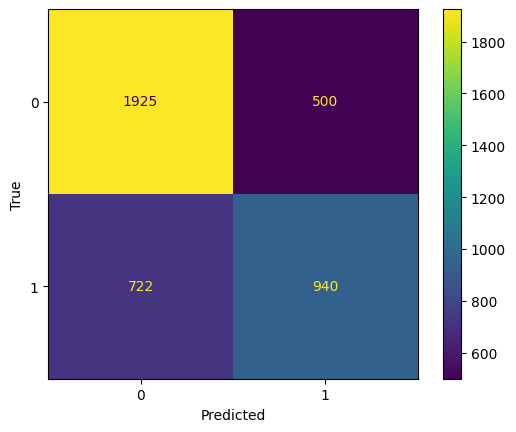

In [27]:
train_test(0.5)

## Let's observe the Accuracy, Recall, Precision, and F1_Score at all the above thresholds

In [28]:

df=pd.DataFrame({
    'Threshold':Thres_lst,
    'Accuracy':Acc_lst,
    'Recall':Rec_lst,
    'Precision':Prec_lst,
    'F1_score':F1_lst
})

In [29]:
def plot(col1,col2):
    df.plot(x=col1, y=col2, kind="bar", title=col2)

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

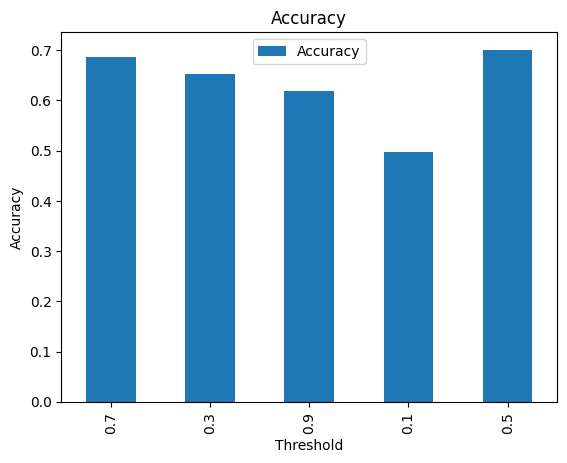

In [30]:
plot('Threshold','Accuracy')

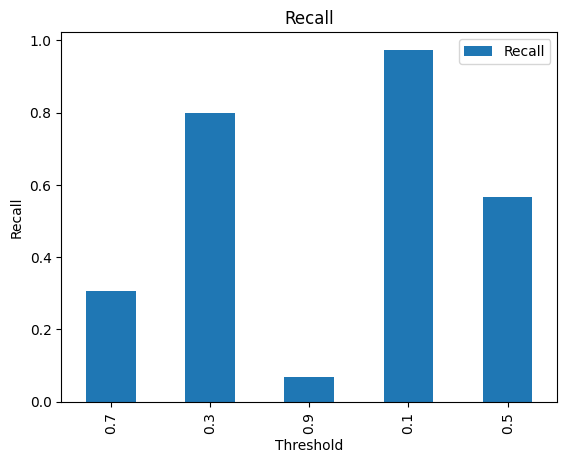

In [31]:
plot('Threshold','Recall')

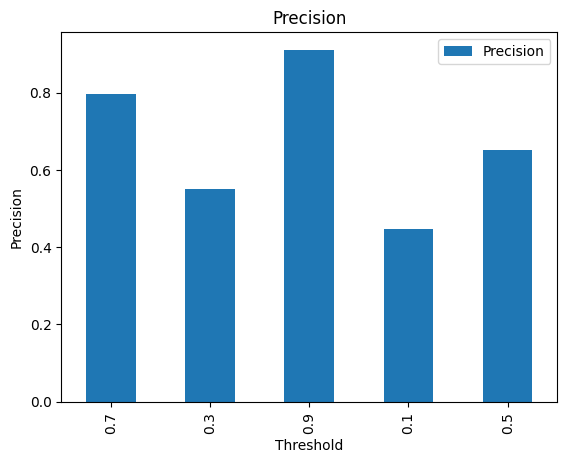

In [32]:
plot('Threshold','Precision')

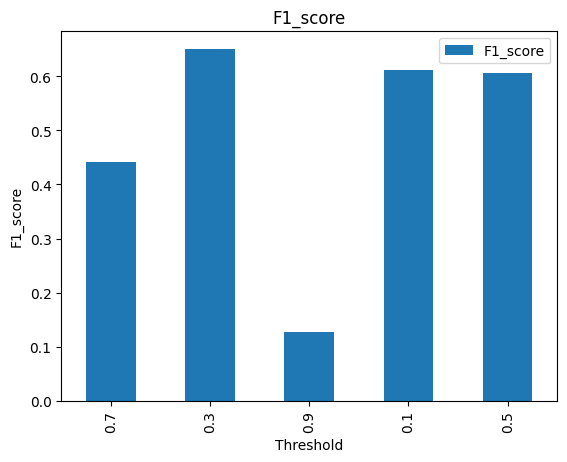

In [33]:
plot('Threshold','F1_score')